In [1]:
# %pip install pandas yfinance matplotlib pymongo aiohttp tqdm

In [1]:
from dotenv import load_dotenv
import os
load_dotenv()

os.getenv("MONGO_DB_NAME")

'Database'

In [2]:
import sys
import os

# Get the path to the project root dynamically
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(project_root)

In [3]:
from app.services.YahooService import YahooService

yService = YahooService(max_workers=20)

await yService.initDatabase(batchSize=100, delayBetweenBatches=1, delayBetweenRequests=0.5)

✅ nasdaq.csv found
✅ Connected to MongoDB
✅ Connected to Yahoo Finance
Fetching data for SPY
Fetching data for AACG
Fetching data for AADI
Fetching data for AAL
Fetching data for AAME
Fetching data for AAOI
Fetching data for AAON
Fetching data for AAPL
Fetching data for ABAT
Fetching data for ABCL
Fetching data for ABEO
Fetching data for ABL
Fetching data for ABLLL
Fetching data for ABLLW
Fetching data for ABLV
Fetching data for ABLVW
Fetching data for ABNB
Fetching data for ABOS
Fetching data for ABP
Fetching data for ABPWW
Fetching data for ABSI
Fetching data for ABTS
Fetching data for ABUS
Fetching data for ABVC
Fetching data for ABVE
Fetching data for ABVEW
Fetching data for ABVX
Fetching data for ACAD
Fetching data for ACB
Fetching data for ACCD
Fetching data for ACDC
Fetching data for ACET
Fetching data for ACGL
Fetching data for ACGLN
Fetching data for ACGLO
Fetching data for ACHC
Fetching data for ACHL
Fetching data for ACHV
Fetching data for ACIC
Fetching data for ACIU
Fetchin

In [4]:
from app.services.YahooService import YahooService

yService = YahooService(max_workers=20)
yService.addMinMax()

In [6]:
from app.services.YahooService import YahooService

yService = YahooService(max_workers=20)
await yService.updateDatabase(batchSize=100)

Fetching data for SPY
No new data available for SPY.
Fetching data for ABLLL
Fetching data for ABLV
Fetching data for ABP
Fetching data for ABOS
Fetching data for ABSI
Fetching data for ABL
Fetching data for ABNB
Fetching data for AADI
Fetching data for ABCL
Fetching data for ABAT
Fetching data for ABTS
Fetching data for ABVX
Fetching data for AAOI
Fetching data for ABVC
Fetching data for AACG
Fetching data for ACDC
Fetching data for ACCD
Fetching data for ACGLN
Fetching data for ABUS
Fetching data for ACB
Fetching data for AAL
Fetching data for ACET
Fetching data for ACGLO
Fetching data for ACHL
Fetching data for ACIU
Fetching data for ABEO
Fetching data for ACON
Fetching data for AAME
Fetching data for ACIC
Fetching data for ACHC
Fetching data for ADAG
Fetching data for ACAD
Fetching data for ACHV
Fetching data for ACLS
Fetching data for ACLX
Fetching data for ACRV
Fetching data for ACVA
Fetching data for ACT
Fetching data for ACMR
Fetching data for ACXP
Fetching data for ACRS
Fetchi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from app.services.PortfolioService import PortfolioService
from app.services.OptimizeService import OptimizeService
from app.models.database import db

pService = PortfolioService()
oService = OptimizeService()

longestDays = 1260

stocks = ["AAPL", "AMZN", "GOOGL", "MSFT", "TSLA"]
data = db['stockHistoryPrice'].find({'symbol': {'$in': stocks}}).sort('date', -1).limit(len(stocks) * longestDays)

df = pd.DataFrame(list(data))
df = df[['date', 'symbol', 'close']]
df = df.pivot(index='date', columns='symbol', values='close')
dfReturn = df.pct_change(fill_method=None).dropna()
returns = dfReturn.mean() * 252
covMatrix = np.cov(dfReturn, rowvar=False) * 252

min_volatile = 0.30
max_volatile = 0.60
step = 0.05
result = oService.optimizeRangeRisk(min_volatile, max_volatile, step, returns, covMatrix, riskFreeRate=0.02)
result

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from app.services.PortfolioService import PortfolioService
from app.services.OptimizeService import OptimizeService
from app.models.database import db

pService = PortfolioService()
oService = OptimizeService()

longestDays = 1260

stocks = ["AAPL", "AMZN", "GOOGL", "MSFT", "TSLA"]
data = db['stockHistoryPrice'].find({'symbol': {'$in': stocks}}).sort('date', -1).limit(len(stocks) * longestDays)

df = pd.DataFrame(list(data))
df = df[['date', 'symbol', 'close']]
df = df.pivot(index='date', columns='symbol', values='close')
dfReturn = df.pct_change(fill_method=None).dropna()
returns = dfReturn.mean() * 252
covMatrix = np.cov(dfReturn, rowvar=False) * 252


for i in range(1, 101):
    try:
        weight = oService.optimizeFixedReturn(i/100, returns, covMatrix)
        check_for_negative = [w for w in weight if w < 0]
        if not check_for_negative:  
            print(i/100, pService.getPortfolioReturn(weight, returns), (weight) , sum(weight))
        else:
            print(i/100, "Negative weight")
    except Exception as e:
        print(i/100, e)

In [7]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from app.services.PortfolioService import PortfolioService
# from app.services.OptimizeService import OptimizeService
# from app.models.database import db

# pService = PortfolioService()
# oService = OptimizeService()

# longestDays = 1260

# stocks = ["AAPL", "AMZN", "GOOGL", "MSFT", "TSLA"]
# data = db['stockHistoryPrice'].find({'symbol': {'$in': stocks}}).sort('date', -1).limit(len(stocks) * longestDays)

# df = pd.DataFrame(list(data))
# df = df[['date', 'symbol', 'close']]
# df = df.pivot(index='date', columns='symbol', values='close')
# dfReturn = df.pct_change(fill_method=None).dropna()
# returns = dfReturn.mean() * 252
# covMatrix = np.cov(dfReturn, rowvar=False) * 252


# for i in range(8, 101):
#     try:
#         weight = oService.optimizeFixedRisk(i/100, returns, covMatrix) 
#         print(i/100, pService.getPortfolioStdDev(weight, covMatrix), sum(weight), weight)
#     except Exception as e:
#         print(i/100, e)

In [ ]:
import time
import random 

start = time.time()
for _ in range(1000):
    weight = oService.optimizeFixedRisk(random.randint(30, 90)/100, returns, covMatrix)
end = time.time()
print(end - start)

In [ ]:
import time

start = time.time()
for _ in range(1000):
    weight = oService.optimizeFixedReturn(random.randint(10, 70)/100, returns, covMatrix)
end = time.time()
print(end - start)

In [10]:
# # Require to run the following code to get the nasdaq.csv file
# import pandas as pd

# nasdaqFile = "./data/nasdaq-stockscreener.csv"
# nasdaqCompanyFile = "./data/nasdaq-listed-symbols.csv"
# df = pd.read_csv(nasdaqFile)
# dfCompany = pd.read_csv(nasdaqCompanyFile)

# dfCompany.columns

# df = df.merge(dfCompany[['Symbol', 'Company Name']], left_on='Symbol', right_on='Symbol', how='left')
# df['Name'] = df['Company Name']
# df = df.drop(columns=['Company Name'])
# df.to_csv("./data/nasdaq.csv", index=False)

In [96]:
from app.models.database import db
import pandas as pd

stockCollection = db['stockData']
stockHistoryPriceCollection = db['stockHistoryPrice']

stocks = pd.DataFrame(stockCollection.find({}))
stocks.set_index("_id", inplace=True)
stocks = stocks.sort_values(by='marketCap', ascending=False)
stocks.head()

,symbol,name,price,annual5YrsReturn,annual3YrsReturn,annual1YrReturn,ytdReturn,sector,fiveYrsVolatility,threeYrsVolatility,oneYrVolatility,industry,Return,Volatility,beta,marketCap,threeMthsMomentum,dataCollectedDays
_id,,,,,,,,,,,,,,,,,,
6790efb6e9137eb23a68731b,NVDA,NVIDIA Corporation,140.830002,0.770504,0.703332,1.005365,0.018220,Technology,0.540241,0.552463,0.529786,Semiconductors,0.770504,0.540241,2.285826,3.448927e+12,0.020578,6540
6790ed89e9137eb23af9f1b7,AAPL,Apple Inc.,222.639999,0.264505,0.126424,0.182169,-0.086980,Technology,0.317589,0.272197,0.230030,Computer Manufacturing,0.264505,0.317589,1.518908,3.365387e+12,-0.051553,11117
6790ef8fe9137eb23a61bdd8,MSFT,Microsoft Corporation,428.500000,0.245055,0.153772,0.100067,0.023699,Technology,0.304815,0.273585,0.200352,Computer Software: Prepackaged Software,0.245055,0.304815,1.516653,3.185846e+12,0.026778,9791
6790eee4e9137eb23a3ff024,GOOG,Alphabet Inc.,199.630005,0.255827,0.173504,0.343078,0.047212,Technology,0.324073,0.326729,0.278887,Computer Software: Programming Data Processing,0.255827,0.324073,1.464484,2.443671e+12,0.210885,5139
6790eda3e9137eb23aff5874,AMZN,"Amazon.com, Inc.",230.710007,0.244726,0.191038,0.437102,0.047634,Consumer Discretionary,0.359993,0.383046,0.282147,Catalog/Specialty Distribution,0.244726,0.359993,1.412360,2.425918e+12,0.220752,6965


In [ ]:
# stockCollection.delete_one({'symbol': 'NCPL'})
# stockHistoryPriceCollection.delete_many({'symbol': 'NCPL'})
# stockCollection.delete_one({'symbol': 'WHLRL'})
# stockHistoryPriceCollection.delete_many({'symbol': 'WHLRL'})

DeleteResult({'n': 847, 'ok': 1.0}, acknowledged=True)

In [97]:
filterColumns = ["Return", "Volatility", "beta", "marketCap", "threeMthsMomentum"]

stocks[filterColumns].describe()

,Return,Volatility,beta,marketCap,threeMthsMomentum
count,3264.000000,3264.000000,3264.000000,3.264000e+03,3264.000000
mean,0.275100,1.036002,1.045252,1.134272e+10,0.104726
std,1.510229,2.661339,0.722843,1.330413e+11,1.105707
min,-5.115638,0.000000,-8.238910,0.000000e+00,-0.981683
25%,-0.003436,0.442809,0.610362,3.895151e+07,-0.179200
50%,0.133131,0.700095,1.090029,2.926102e+08,-0.006221
75%,0.324820,1.078278,1.463173,1.670304e+09,0.145224
max,52.020313,115.136976,14.641142,3.448927e+12,31.857143


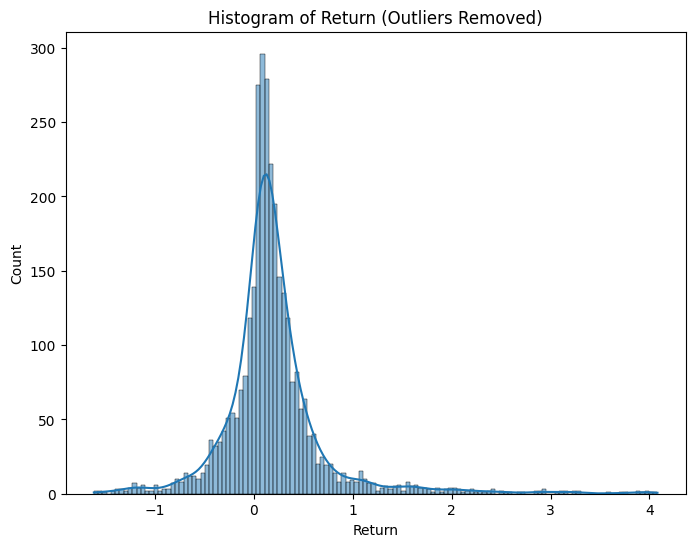

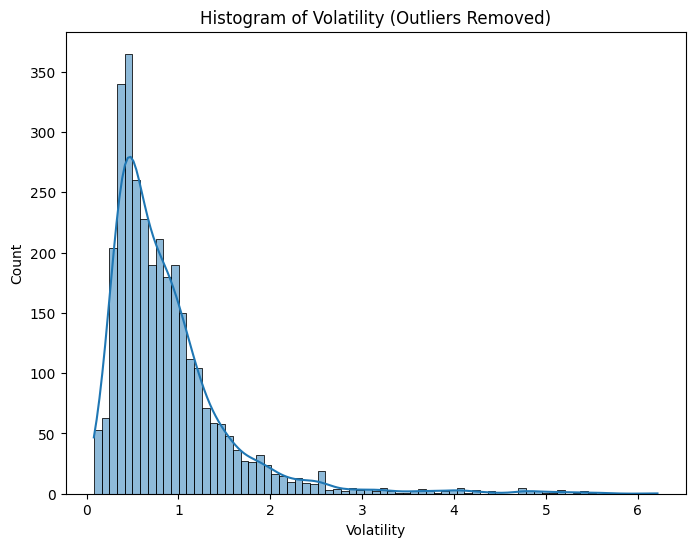

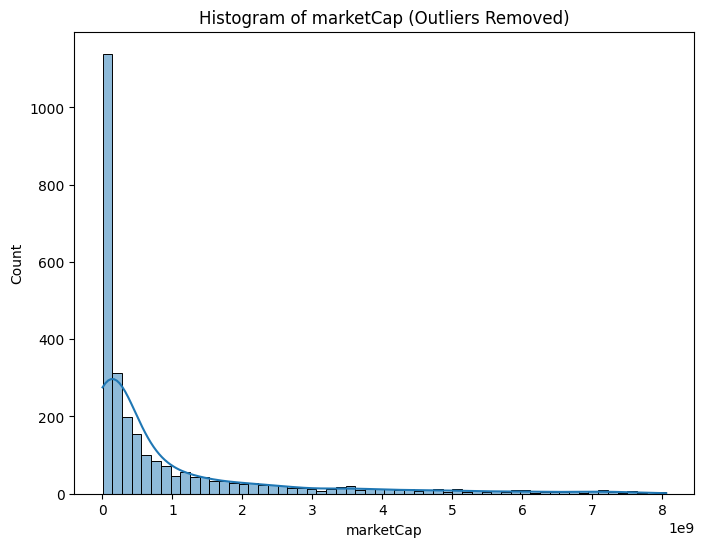

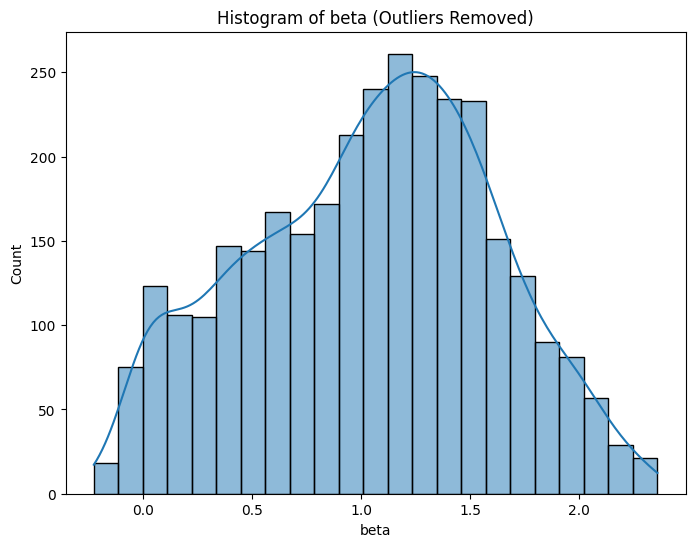

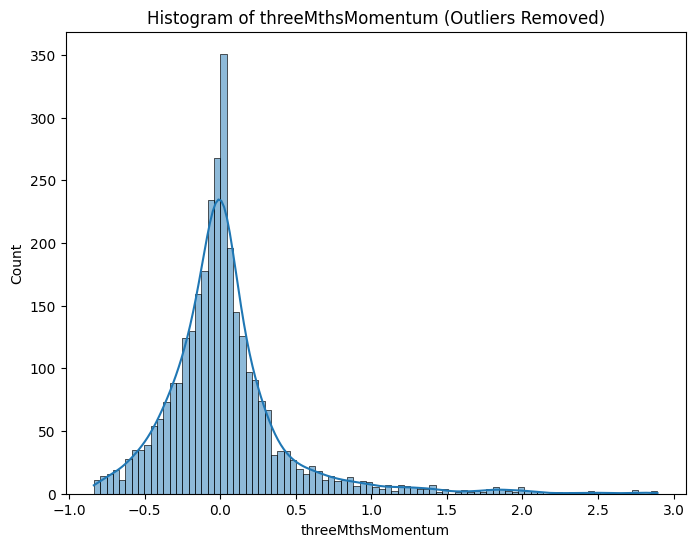

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_cut_outliers(stocks, field, q_min=0.01, q_max=0.99):
    # Special case for marketCap
    if field == "marketCap":
        q_min = 0.05
        q_max = 0.90
    
    # Filter the stocks based on the quantiles
    q_low = stocks[field].quantile(q_min)
    q_high = stocks[field].quantile(q_max)
    filtered_stocks = stocks[(stocks[field] > q_low) & (stocks[field] < q_high)]
    
    # Plot the histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(filtered_stocks[field], kde=True)
    plt.title(f"Histogram of {field} (Outliers Removed)")
    plt.show()

# Example usage
plot_histogram_cut_outliers(stocks, "Return")
plot_histogram_cut_outliers(stocks, "Volatility")
plot_histogram_cut_outliers(stocks, "marketCap")
plot_histogram_cut_outliers(stocks, "beta")
plot_histogram_cut_outliers(stocks, "threeMthsMomentum")


In [ ]:
# Return: Normal Distribution -> Z-Standardize
# Volatility: Skew Distribution -> Log-Standardize
# Market Cap: Skew Distribution -> Log-Standardize
# Beta: Normal Distribution -> Z-Standardize
# Momentum (3Mths) Normal Distribution -> Z-Standardize

In [120]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

scaler = StandardScaler()
transformer = QuantileTransformer(output_distribution='normal')

stocks["marketCapLog"] = np.log1p(stocks["marketCap"])
stocks["VolatilityLog"] = np.log1p(stocks["Volatility"])
stocks["ReturnZscore"] = scaler.fit_transform(stocks[["Return"]])
stocks["betaZscore"] = scaler.fit_transform(stocks[["beta"]])
stocks["threeMthsMomentumZscore"] = scaler.fit_transform(stocks[["threeMthsMomentum"]])

standardizedField = ["ReturnZscore", "VolatilityLog", "marketCapLog", "betaZscore", "threeMthsMomentumZscore"]
stocks[standardizedField].describe()

,ReturnZscore,VolatilityLog,marketCapLog,betaZscore,threeMthsMomentumZscore
count,3.264000e+03,3264.000000,3264.000000,3.264000e+03,3.264000e+03
mean,-1.850372e-17,0.598055,19.071191,6.966105e-17,-1.088454e-17
std,1.000153e+00,0.361986,3.858329,1.000153e+00,1.000153e+00
min,-3.570031e+00,0.000000,0.000000,-1.284593e+01,-9.826976e-01
25%,-1.844613e-01,0.366592,17.477827,-6.017314e-01,-2.568218e-01
50%,-9.401961e-02,0.530684,19.494352,6.195529e-02,-1.003554e-01
75%,3.292735e-02,0.731540,21.236271,5.782526e-01,3.663189e-02
max,3.426841e+01,4.754770,28.869084,1.881181e+01,2.872125e+01


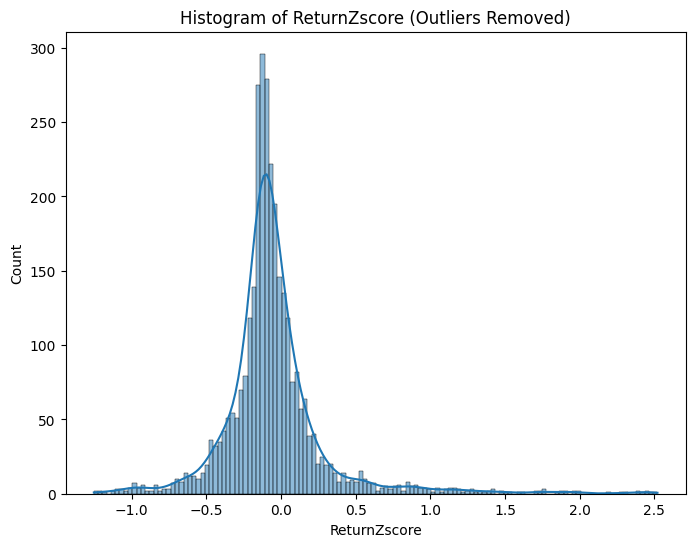

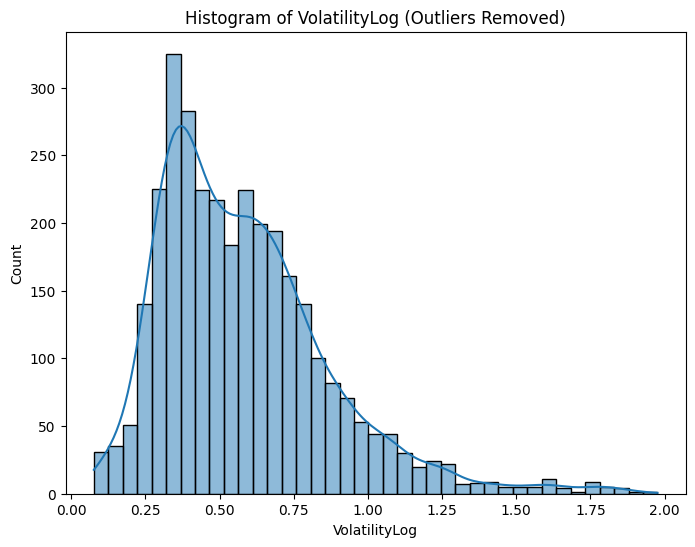

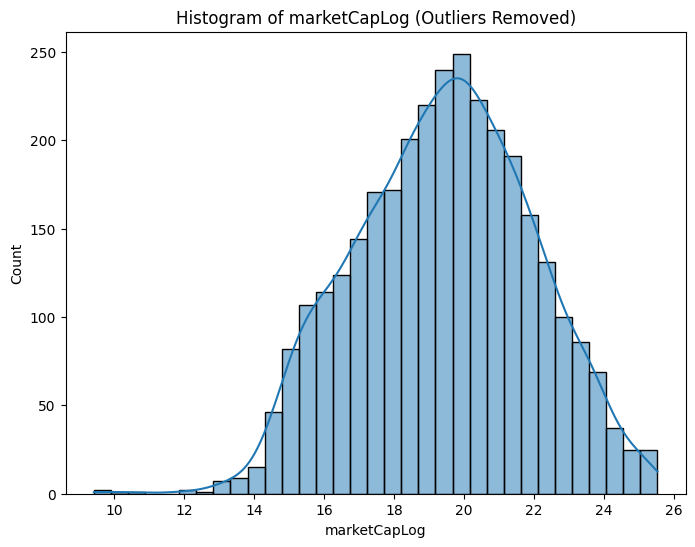

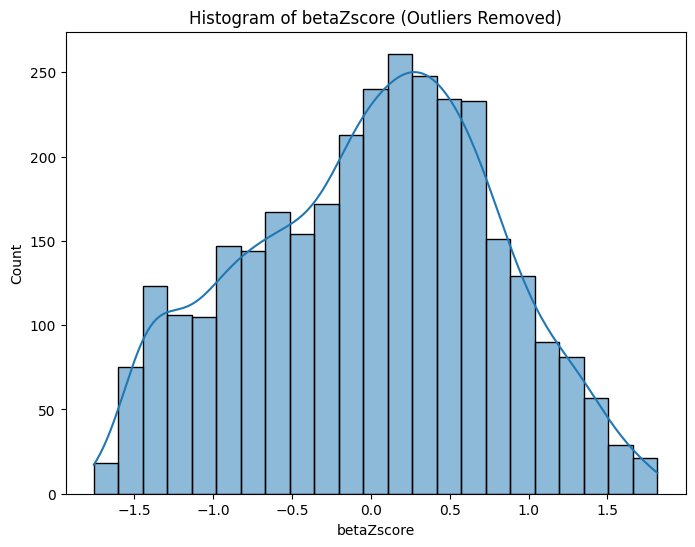

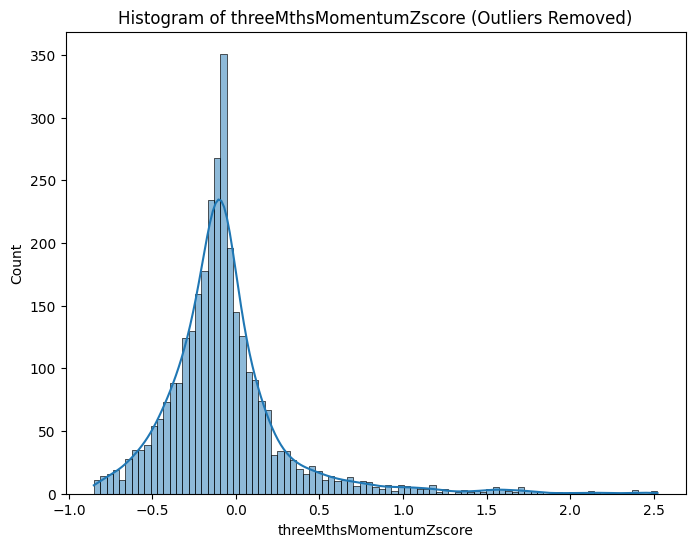

In [ ]:
for field in standardizedField:
    plot_histogram_cut_outliers(stocks, field)

In [121]:
stocks[standardizedField]

,ReturnZscore,VolatilityLog,marketCapLog,betaZscore,threeMthsMomentumZscore
_id,,,,,
6790efb6e9137eb23a68731b,0.328082,0.431939,28.869084,1.716507,-0.076115
6790ed89e9137eb23af9f1b7,-0.007016,0.275803,28.844564,0.655369,-0.141361
6790ef8fe9137eb23a61bdd8,-0.019898,0.266061,28.789739,0.652249,-0.070506
6790eee4e9137eb23a3ff024,-0.012763,0.280712,28.524522,0.580065,0.096024
6790eda3e9137eb23aff5874,-0.020115,0.307480,28.517231,0.507945,0.104950
...,...,...,...,...,...
6790f01ae9137eb23a7bb15c,-0.101067,0.210971,0.000000,0.213192,0.002700
6790effce9137eb23a75d403,-0.142856,0.157839,0.000000,-1.390699,-0.066078
6790edf7e9137eb23a103b51,-0.133052,0.056964,0.000000,-1.486480,-0.070685


In [123]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
MinMaxScaler = MinMaxScaler(feature_range=[-1, 1])

standardizedField = ["ReturnZscore", "VolatilityLog", "marketCapLog", "betaZscore", "threeMthsMomentumZscore"]
NormalizeField = [
    "returnMinMax",
    "volatileMinMax",
    "marketCapMinMax",
    "betaMinMax",
    "threeMthsMomentumMinMax"
]

stocks[NormalizeField] = scaler.fit_transform(stocks[standardizedField])

stocks[NormalizeField].describe()    

,returnMinMax,volatileMinMax,marketCapMinMax,betaMinMax,threeMthsMomentumMinMax
count,3.264000e+03,3.264000e+03,3.264000e+03,3.264000e+03,3.264000e+03
mean,-3.265362e-18,-1.741526e-16,1.393221e-16,3.483053e-17,-6.530724e-18
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-3.570031e+00,-1.652403e+00,-4.943620e+00,-1.284593e+01,-9.826976e-01
25%,-1.844613e-01,-6.395239e-01,-4.130306e-01,-6.017314e-01,-2.568218e-01
50%,-9.401961e-02,-1.861433e-01,1.096915e-01,6.195529e-02,-1.003554e-01
75%,3.292735e-02,3.688142e-01,5.612305e-01,5.782526e-01,3.663189e-02
max,3.426841e+01,1.148485e+01,2.539803e+00,1.881181e+01,2.872125e+01


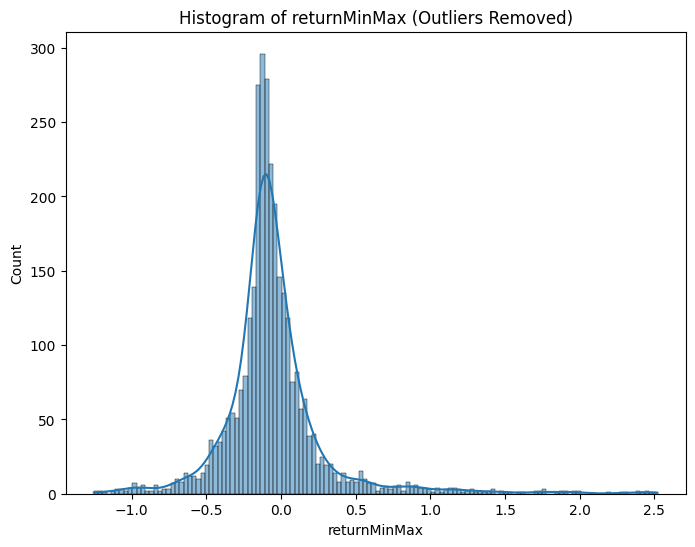

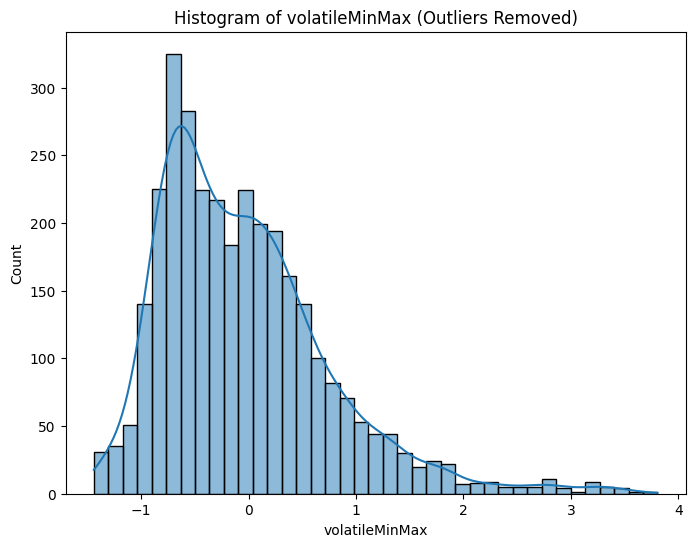

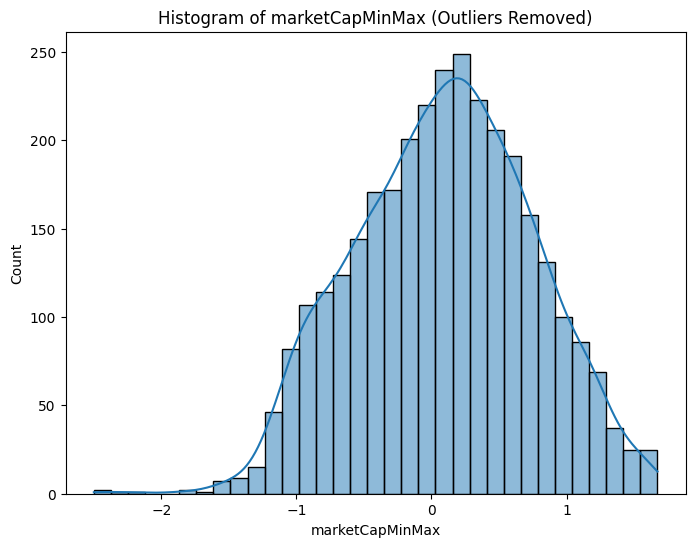

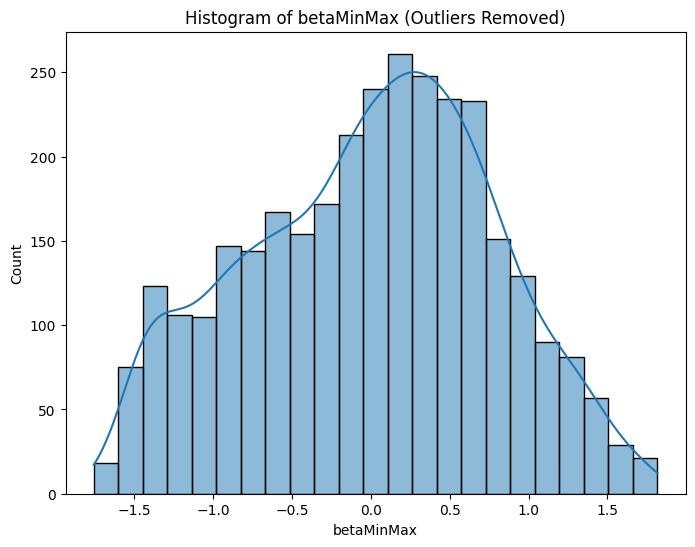

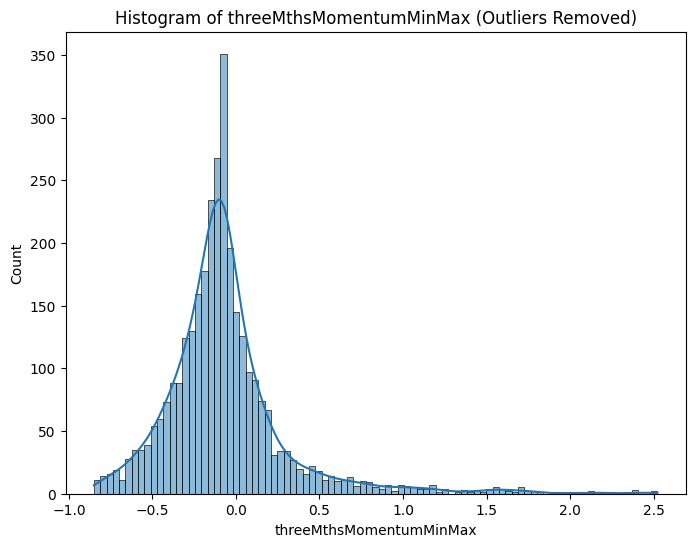

In [108]:
for field in NormalizeField:
    plot_histogram_cut_outliers(stocks, field)

In [ ]:
stocks = stocks.drop(columns=standardizedField)

In [112]:
stocks.columns

Index(['symbol', 'name', 'price', 'annual5YrsReturn', 'annual3YrsReturn',
       'annual1YrReturn', 'ytdReturn', 'sector', 'fiveYrsVolatility',
       'threeYrsVolatility', 'oneYrVolatility', 'industry', 'Return',
       'Volatility', 'beta', 'marketCap', 'threeMthsMomentum',
       'dataCollectedDays', 'returnMinMax', 'volatileMinMax',
       'marketCapMinMax', 'betaMinMax', 'threeMthsMomentumMinMax'],
      dtype='object')

In [116]:
records = stocks.to_dict(orient="records")


for record in records:
    stockCollection.update_one(
        {"symbol": record["symbol"]},  # Filter by the unique key 'symbol'
        {"$set": record},              # Update the document with new data
        upsert=True                    # Insert if no matching document exists
    )


In [136]:
stocks.replace(float('nan'), None)

stocks.isna().sum()

symbol                        0
name                          0
price                         0
annual5YrsReturn           1116
annual3YrsReturn            337
annual1YrReturn               0
ytdReturn                     0
sector                        0
fiveYrsVolatility          1116
threeYrsVolatility          337
oneYrVolatility               0
industry                      0
Return                        0
Volatility                    0
beta                          0
marketCap                     0
threeMthsMomentum             0
dataCollectedDays             0
returnMinMax                  0
volatileMinMax                0
marketCapMinMax               0
betaMinMax                    0
threeMthsMomentumMinMax       0
marketCapLog                  0
VolatilityLog                 0
ReturnZscore                  0
betaZscore                    0
threeMthsMomentumZscore       0
dtype: int64

In [125]:
# stocks.replace(float('nan', None))

,symbol,name,price,annual5YrsReturn,annual3YrsReturn,annual1YrReturn,ytdReturn,sector,fiveYrsVolatility,threeYrsVolatility,...,returnMinMax,volatileMinMax,marketCapMinMax,betaMinMax,threeMthsMomentumMinMax,marketCapLog,VolatilityLog,ReturnZscore,betaZscore,threeMthsMomentumZscore
_id,,,,,,,,,,,,,,,,,,,,,
6790efb6e9137eb23a68731b,NVDA,NVIDIA Corporation,140.830002,0.770504,0.703332,1.005365,0.018220,Technology,0.540241,0.552463,...,0.328082,-0.458971,2.539803,1.716507,-0.076115,28.869084,0.431939,0.328082,1.716507,-0.076115
6790ed89e9137eb23af9f1b7,AAPL,Apple Inc.,222.639999,0.264505,0.126424,0.182169,-0.086980,Technology,0.317589,0.272197,...,-0.007016,-0.890369,2.533446,0.655369,-0.141361,28.844564,0.275803,-0.007016,0.655369,-0.141361
6790ef8fe9137eb23a61bdd8,MSFT,Microsoft Corporation,428.500000,0.245055,0.153772,0.100067,0.023699,Technology,0.304815,0.273585,...,-0.019898,-0.917286,2.519235,0.652249,-0.070506,28.789739,0.266061,-0.019898,0.652249,-0.070506
6790eee4e9137eb23a3ff024,GOOG,Alphabet Inc.,199.630005,0.255827,0.173504,0.343078,0.047212,Technology,0.324073,0.326729,...,-0.012763,-0.876805,2.450486,0.580065,0.096024,28.524522,0.280712,-0.012763,0.580065,0.096024
6790eda3e9137eb23aff5874,AMZN,"Amazon.com, Inc.",230.710007,0.244726,0.191038,0.437102,0.047634,Consumer Discretionary,0.359993,0.383046,...,-0.020115,-0.802848,2.448595,0.507945,0.104950,28.517231,0.307480,-0.020115,0.507945,0.104950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790f01ae9137eb23a7bb15c,QQQX,Nuveen NASDAQ 100 Dynamic Overwrite Fund,27.480000,0.122489,0.084166,0.253352,0.022702,Finance,0.234876,0.209749,...,-0.101067,-1.069498,-4.943620,0.213192,0.002700,0.000000,0.210971,-0.101067,0.213192,0.002700
6790effce9137eb23a75d403,PPYA,Papaya Growth Opportunity Corp. I,11.400000,NaN,NaN,0.059388,0.013333,Finance,NaN,NaN,...,-0.142856,-1.216299,-4.943620,-1.390699,-0.066078,0.000000,0.157839,-0.142856,-1.390699,-0.066078
6790edf7e9137eb23a103b51,BUJA,Bukit Jalil Global Acquisition 1 Ltd.,11.200000,NaN,NaN,0.074192,0.001789,Finance,NaN,NaN,...,-0.133052,-1.495014,-4.943620,-1.486480,-0.070685,0.000000,0.056964,-0.133052,-1.486480,-0.070685


In [143]:
import re

search_term = "App"

query = {
    "$or": [
        {"symbol": {"$regex": re.escape(search_term), "$options": "i"}},
        {"name": {"$regex": re.escape(search_term), "$options": "i"}},
        {"sector"}
    ]
}

In [90]:
from app.models.database import db

portfolioCollection = db['portfolioData']
data = list(portfolioCollection.find())
portfolio = data[0]
portfolio

{'_id': ObjectId('6791eb25d09ce8553be16490'),
 'email': '0233010@gmail.com',
 'name': 'Portfolio',
 'portfolio': {'assets': [{'id': '6790ed89e9137eb23af9f1b7',
    'symbol': 'AAPL',
    'name': 'Apple Inc.',
    'price': 222.64,
    'annual5YrsReturn': 0.26,
    'annual3YrsReturn': 0.13,
    'annual1YrReturn': 0.18,
    'ytdReturn': -0.09,
    'sector': 'Technology',
    'industry': 'Computer Manufacturing',
    'marketCap': '3.4t',
    'dataCollectedDays': 11117},
   {'id': '6790eda3e9137eb23aff5874',
    'symbol': 'AMZN',
    'name': 'Amazon.com, Inc.',
    'price': 230.71,
    'annual5YrsReturn': 0.24,
    'annual3YrsReturn': 0.19,
    'annual1YrReturn': 0.44,
    'ytdReturn': 0.05,
    'sector': 'Consumer Discretionary',
    'industry': 'Catalog/Specialty Distribution',
    'marketCap': '2.4t',
    'dataCollectedDays': 6965},
   {'id': '6790efb6e9137eb23a68731b',
    'symbol': 'NVDA',
    'name': 'NVIDIA Corporation',
    'price': 140.83,
    'annual5YrsReturn': 0.77,
    'annual3Y

In [92]:
import datetime

newPortfolio = {
    "email": "ads",
    "name": "My Portfolio",
    "portfolio": {
        "assets": [],
        "investorViews": []
    },
    "createdAt": datetime.datetime.now(),
    "updatedAt": datetime.datetime.now()
}

portfolioCollection.insert_one(newPortfolio)

InsertOneResult(ObjectId('67926921e912da2cecb0860b'), acknowledged=True)

In [85]:
from app.models.database import db
from app.schemas.stockData import stockData, stockDB
from typing import Optional
from pydantic import BaseModel

stockCollection = db["stockData"]

def reshapeStockData(data):
    stock_data_fields = stockData.__annotations__.keys()
    reshaped_data = {}
    reshaped_data["id"] = str(data["_id"])
    for field in stock_data_fields:
        if field == "id":
            continue
        reshaped_data[field] = data.get(field, getattr(stockData, field, None))
    return stockData(**reshaped_data)

stocks = [reshapeStockData(x) for x in stockCollection.find()]
stocks

[stockData(id='6790ed81e9137eb23af8b978', symbol='ABLLL', name='Abacus Life, Inc.', price=27.0, annual5YrsReturn=nan, annual3YrsReturn=nan, annual1YrReturn=0.20255643802861412, ytdReturn=-0.11184209411824494, sector='Finance', industry='Investment Managers', marketCap=2015586369.0, dataCollectedDays=289),
 stockData(id='6790ed81e9137eb23af8ba9a', symbol='ABLV', name='Able View Global Inc.', price=1.149999976158142, annual5YrsReturn=nan, annual3YrsReturn=nan, annual1YrReturn=-0.38195216301395335, ytdReturn=0.5013055051738935, sector='Consumer Discretionary', industry='Other Consumer Services', marketCap=48713118.0, dataCollectedDays=346),
 stockData(id='6790ed82e9137eb23af8bbf5', symbol='ABL', name='Abacus Life, Inc.', price=7.519999980926514, annual5YrsReturn=nan, annual3YrsReturn=0.03207857113513349, annual1YrReturn=-0.30482630483159173, ytdReturn=-0.028423746343324244, sector='Finance', industry='Investment Managers', marketCap=561584343.0, dataCollectedDays=1094),
 stockData(id='679

In [56]:
list(stockCollection.find({"symbol": "AAPL"}))

[{'_id': ObjectId('6790ed89e9137eb23af9f1b7'),
  'symbol': 'AAPL',
  'name': 'Apple Inc.',
  'price': 222.63999938964844,
  'annual5YrsReturn': 0.26450549711534727,
  'annual3YrsReturn': 0.1264243557030357,
  'annual1YrReturn': 0.18216941369840373,
  'ytdReturn': -0.08697972599132693,
  'sector': 'Technology',
  'fiveYrsVolatility': 0.317588720579543,
  'threeYrsVolatility': 0.2721973848352385,
  'oneYrVolatility': 0.23002969731163986,
  'industry': 'Computer Manufacturing',
  'Return': 0.26450549711534727,
  'Volatility': 0.317588720579543,
  'beta': 1.5189081286098698,
  'marketCap': 3365386832720.0,
  'threeMthsMomentum': -0.05155338320235121,
  'dataCollectedDays': 11117,
  'betaMinMax': 0.65536929458663,
  'marketCapMinMax': 2.533446451617103,
  'returnMinMax': -0.007016308687126739,
  'threeMthsMomentumMinMax': -0.14136054027054637,
  'volatileMinMax': -0.8903685849072417}]

In [46]:
import re
from typing import List, Optional, Dict

def generateQuery(
    searchTerm: Optional[str], 
    sectors: Optional[List[str]] = None, 
    marketCaps: Optional[List[str]] = None, 
) -> Dict:
    marketCapRange = {
        "Mega": {"$gt": 200_000_000_000},
        "Large": {"$gte": 10_000_000_000, "$lte": 200_000_000_000},
        "Medium": {"$gte": 2_000_000_000, "$lte": 10_000_000_000},
        "Small": {"$gte": 300_000_000, "$lte": 2_000_000_000},
        "Micro": {"$gte": 50_000_000, "$lte": 300_000_000},
        "Nano": {"$lt": 50_000_000}
    }
    
    query = {"$and": []}

    # Add sectors filter if provided
    if sectors:
        query["$and"].append({"sector": {"$in": sectors}})

    # Add market cap filter if provided
    if marketCaps and marketCapRange:
        marketCapsQuery = [marketCapRange[marketCap] for marketCap in marketCaps if marketCap in marketCapRange]
        if marketCapsQuery:
            query["$and"].append({"$or": [{"marketCap": cap} for cap in marketCapsQuery]})

    # Add search term filter if provided
    if searchTerm:
        escapedTerm = re.escape(searchTerm)
        query["$and"].append({
            "$or": [
                {"name": {"$regex": escapedTerm, "$options": "i"}},
                {"symbol": {"$regex": escapedTerm, "$options": "i"}}
            ]
        })

    # Remove $and if it's empty
    if not query["$and"]:
        query.pop("$and")

    return query

# Example usage
searchTerm = "AA"
sectors = []
marketCaps = []

query = generateQuery(searchTerm, sectors, marketCaps)

stocks = pd.DataFrame(stockCollection.find(query))
print(len(stocks))
stocks.head()


18


,_id,symbol,name,price,annual5YrsReturn,annual3YrsReturn,annual1YrReturn,ytdReturn,sector,fiveYrsVolatility,...,Volatility,beta,marketCap,threeMthsMomentum,dataCollectedDays,betaMinMax,marketCapMinMax,returnMinMax,threeMthsMomentumMinMax,volatileMinMax
0,6790ed85e9137eb23af8dace,AADI,"Aadi Bioscience, Inc.",3.020000,0.186253,-0.376620,0.939342,-0.038217,Health Care,0.900415,...,0.900415,0.849496,7.443512e+07,0.431280,1741,-0.270856,-0.245157,-0.058839,0.295380,0.121619
1,6790ed85e9137eb23af8e19c,AAOI,"Applied Optoelectronics, Inc.",30.150000,0.638622,1.308082,1.291151,-0.153090,Technology,1.012293,...,1.012293,1.810622,1.359108e+09,0.623586,2847,1.058996,0.507785,0.240744,0.469329,0.279668
2,6790ed85e9137eb23af8fb32,AACG,ATA Creativity Global,0.940000,1.787560,0.028843,0.131018,0.068182,Real Estate,4.373468,...,4.373468,1.094946,3.008012e+07,-0.060000,4273,0.068758,-0.480026,1.001631,-0.149001,2.993445
3,6790ed86e9137eb23af9105e,AAL,"American Airlines Group, Inc.",18.639999,0.107048,0.107716,0.401092,0.096471,Consumer Discretionary,0.623869,...,0.623869,1.793342,1.224892e+10,0.423988,4860,1.035087,1.077707,-0.111293,0.288784,-0.312886
4,6790ed89e9137eb23af9f1b7,AAPL,Apple Inc.,222.639999,0.264505,0.126424,0.182169,-0.086980,Technology,0.317589,...,0.317589,1.518908,3.365387e+12,-0.051553,11117,0.655369,2.533446,-0.007016,-0.141361,-0.890369


In [48]:
weights = {
    "returnMinMax": 0.2,
    "volatileMinMax": 0.3,
    "marketCapMinMax": 10,
    "betaMinMax": 0.1,
    "threeMthsMomentumMinMax": 0.15
}

def generateRadarWeights(values):
    keys = [
        "returnMinMax",
        "volatileMinMax",
        "marketCapMinMax",
        "betaMinMax",
        "threeMthsMomentumMinMax"
    ]
    return dict(zip(keys, values))

# Example usage
values = [0.2, 0.3, 0.5, 0.1, 0.15]
weights = generateRadarWeights(values)

sectors = ["Technology", "Healthcare", "Finance"]
query = {
    "$and": [
        {"sector": {"$in": sectors}},
        {
            "$or": [
                {"name": {"$regex": re.escape(search_term), "$options": "i"}},
                {"symbol": {"$regex": re.escape(search_term), "$options": "i"}}
            ]
        }
    ]
}

pipeline = [
    {
        "$match": query
    },
    {
        "$addFields": {
            "weightedSum": {
                "$add": [
                    {"$multiply": ["$returnMinMax", weights["returnMinMax"]]},
                    {"$multiply": ["$volatileMinMax", weights["volatileMinMax"]]},
                    {"$multiply": ["$marketCapMinMax", weights["marketCapMinMax"]]},
                    {"$multiply": ["$betaMinMax", weights["betaMinMax"]]},
                    {"$multiply": ["$threeMthsMomentumMinMax", weights["threeMthsMomentumMinMax"]]}
                ]
            }
        }
    },
    {
        "$sort": {
            "weightedSum": -1
        }
    }
]

results = pd.DataFrame(stockCollection.aggregate(pipeline))
results

,_id,symbol,name,price,annual5YrsReturn,annual3YrsReturn,annual1YrReturn,ytdReturn,sector,fiveYrsVolatility,...,beta,marketCap,threeMthsMomentum,dataCollectedDays,betaMinMax,marketCapMinMax,returnMinMax,threeMthsMomentumMinMax,volatileMinMax,weightedSum
0,6790ef0ae9137eb23a46e09a,IDAI,T Stamp Inc.,4.650,NaN,4.677336,13.710951,5.808199,Technology,NaN,...,1.503984,7821356.0,21.248804,982,0.634719,-0.829196,2.915393,19.125607,4.433358,4.430801
1,6790eed2e9137eb23a3c221b,GMM,Global Mofy AI Limited,3.900,NaN,NaN,13.492404,0.016949,Technology,NaN,...,1.388664,11431813.0,8.307876,322,0.475159,-0.730812,8.753197,7.420055,5.971149,4.337102
2,6790ef3be9137eb23a50af22,KWE,KWESST Micro Systems Inc.,0.587,NaN,17.674224,-1.271909,-0.227632,Technology,NaN,...,-2.463924,4629800.0,-0.595172,1013,-4.855433,-0.965116,11.522619,-0.633084,8.095975,3.670252
3,6790f0dce9137eb23aa0d763,VSSYW,Versus Systems Inc.,0.069,NaN,14.878317,13.640471,0.326923,Technology,NaN,...,4.301674,172664.0,-0.215909,1007,4.505713,-1.817667,9.671021,-0.290026,6.045290,3.246025
4,6790f00ae9137eb23a793b05,PROP,Prairie Operating Co.,8.290,7.48733,1.186700,0.804048,0.242879,Finance,12.619935,...,0.500871,189996545.0,-0.110515,3000,-0.753227,-0.002249,4.776319,-0.194694,5.563168,2.518563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,6790f019e9137eb23a7b7a59,QETA,Quetta Acquisition Corporation,10.610,NaN,NaN,0.045824,0.002836,Finance,NaN,...,0.009048,0.0,0.011439,285,-1.433732,-4.943620,-0.151839,-0.084381,-1.582104,-3.132839
1150,6790ee91e9137eb23a2ee65f,EVGR,Evergreen Corporation,11.870,NaN,NaN,0.054206,-0.000842,Finance,NaN,...,0.000247,0.0,0.007640,701,-1.445910,-4.943620,-0.146288,-0.087818,-1.581083,-3.133156
1151,6790eeb7e9137eb23a370610,FORL,Four Leaf Acquisition Corporation,11.100,NaN,NaN,0.048543,0.000000,Finance,NaN,...,-0.011967,0.0,0.008174,422,-1.462810,-4.943620,-0.150038,-0.087335,-1.578336,-3.134699
1152,6790eec5e9137eb23a39607f,GDST,Goldenstone Acquisition Limited,11.290,NaN,NaN,0.047711,0.000000,Finance,NaN,...,-0.008272,0.0,0.003556,694,-1.457696,-4.943620,-0.150589,-0.091512,-1.578410,-3.134947


In [4]:
import random


# There are 3 door 1 have a car and 2 have goats
# You pick a door
# The host opens a door with a goat
# You have the option to switch doors
# Should you switch doors?
# Run the simulation 1000 times and see if you should switch doors

def monty_hall(switch=False):
    doors = [0, 0, 1]  # 0 = Goat, 1 = Car
    random.shuffle(doors)  # Shuffle the doors

    # Pick a random door
    choice = random.randint(0, 2)

    # Host opens a door with a goat
    open_door = [i for i in range(3) if i != choice and doors[i] == 0][0]

    # Switch doors
    if switch:
        choice = [i for i in range(3) if i != choice and i != open_door][0]

    return doors[choice]

# Run the simulation 1000 times
n = 10000
no_switch = sum(monty_hall() for _ in range(n))
switch = sum(monty_hall(switch=True) for _ in range(n))

print(f"Without switching: {no_switch} wins")
print(f"With switching: {switch} wins")

Without switching: 3327 wins
With switching: 6616 wins
